# Лабораторна робота №6: Стек та черга

## Контрольні питання

### 1. Що таке стек і які операції можна виконувати зі стеком?

**Стек** — це абстрактна структура даних, що працює за принципом "останнім прийшов — першим вийшов" (LIFO, Last In, First Out). Операції, які можна виконувати зі стеком:

- **push**: додавання елемента на верхівку стека.
- **pop**: видалення верхнього елемента зі стека.
- **top** (або **peek**): отримання верхнього елемента стека без його видалення.
- **isEmpty**: перевірка, чи стек порожній.
- **size**: визначення кількості елементів у стеці.

### 2. Яка основна відмінність між стеком та чергою?

Основна відмінність між **стеком** та **чергою** полягає у принципі доступу до елементів:

- **Стек** працює за принципом LIFO (Last In, First Out), тобто останній доданий елемент буде першим видалений.
- **Черга** працює за принципом FIFO (First In, First Out), тобто перший доданий елемент буде першим видалений.

### 3. Як ви можете реалізувати стек за допомогою масиву і за допомогою зв’язаного списку? Які переваги та недоліки кожного підходу?

## Реалізація стека за допомогою масиву:


In [1]:
class StackArray:
    def __init__(self):
        self.stack = []
    
    def push(self, item):
        self.stack.append(item)
    
    def pop(self):
        if not self.isEmpty():
            return self.stack.pop()
        else:
            return None
    
    def top(self):
        if not self.isEmpty():
            return self.stack[-1]
        else:
            return None
    
    def isEmpty(self):
        return len(self.stack) == 0
    
    def size(self):
        return len(self.stack)

### Переваги:

- Простота реалізації.

- Операції додавання та видалення елементів мають складність 
𝑂(1).

### Недоліки:

- Може бути обмеження на кількість елементів, якщо розмір масиву фіксований.

- Потрібно враховувати розмір масиву для уникнення перевантаження.

### Робота зі стеком: функція `pop_n()` та аналіз асимптотичної складності

#### Завдання:
1. Реалізувати функцію `pop_n(stack, n)`, яка видаляє перші `n+1` елементів зі стеку (з початку до індексу `n` включно).
2. Оцінити асимптотичну складність процедур:
   - `search` (пошук)
   - `insert` (додавання)
   - `delete` (видалення)
3. Побудувати графік часу виконання `pop_n()` при зростанні розміру стеку.


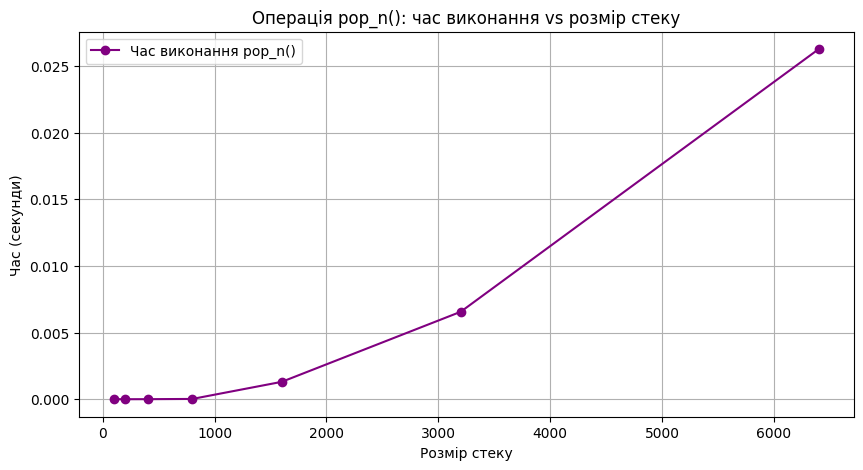

In [1]:
import time
import random
import matplotlib.pyplot as plt

def pop_n(stack, n):
    """Видаляє елементи з індексу 0 до n включно"""
    for _ in range(min(n + 1, len(stack))):
        stack.pop(0)  

sizes = [100, 200, 400, 800, 1600, 3200, 6400]
times = []

for size in sizes:
    stack = list(range(size))  
    n = size // 2              
    
    start = time.time()
    pop_n(stack, n)
    end = time.time()
    
    times.append(end - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, times, marker='o', color='purple', label="Час виконання pop_n()")
plt.title("Операція pop_n(): час виконання vs розмір стеку")
plt.xlabel("Розмір стеку")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.show()


### Асимптотична складність операцій зі стеком

#### Операція `insert` (додавання до кінця)
- **Середній випадок**: `O(1)`
- **Найгірший випадок**: `O(n)` (якщо список перевизначається в памʼяті)

#### Операція `delete` (`pop()` з кінця)
- **Середній випадок**: `O(1)`
- **Найгірший випадок**: `O(1)`

#### Операція `search` (лінійний пошук)
- **Середній випадок**: `O(n/2)` → `O(n)`
- **Найгірший випадок**: `O(n)`

#### Операція `pop_n()` (видалення з початку)
- Кожен `pop(0)` — це `O(n)` через зсув елементів
- **Часова складність**: `O(n²)` у найгіршому випадку при великому `n`

Для ефективнішої реалізації стеку краще використовувати `collections.deque`, де `popleft()` — `O(1)`


## Реалізація стека за допомогою зв’язаного списку:

In [3]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class StackLinkedList:
    def __init__(self):
        self.top = None
    
    def push(self, item):
        new_node = Node(item)
        new_node.next = self.top
        self.top = new_node
    
    def pop(self):
        if not self.isEmpty():
            popped_value = self.top.value
            self.top = self.top.next
            return popped_value
        else:
            return None
    
    def top(self):
        if not self.isEmpty():
            return self.top.value
        else:
            return None
    
    def isEmpty(self):
        return self.top is None
    
    def size(self):
        count = 0
        current = self.top
        while current:
            count += 1
            current = current.next
        return count

### Переваги:

- Не обмежений розміром масиву.

- Можливість динамічного додавання та видалення елементів.

### Недоліки:

- Складніша реалізація.

- Необхідність додаткової пам'яті для збереження вказівників на наступні елементи.

### Реалізація стеку за допомогою зв’язаного списку

#### Завдання:
1. Реалізувати стек за допомогою **однозв’язаного списку**.
2. Написати функцію `pop_n(n)`, яка видаляє `n+1` верхніх елементів стеку.
3. Оцінити асимптотичну складність операцій `push`, `pop`, `search`, `pop_n`.
4. Побудувати графік часу виконання `pop_n()` при зростанні кількості елементів у стеку.


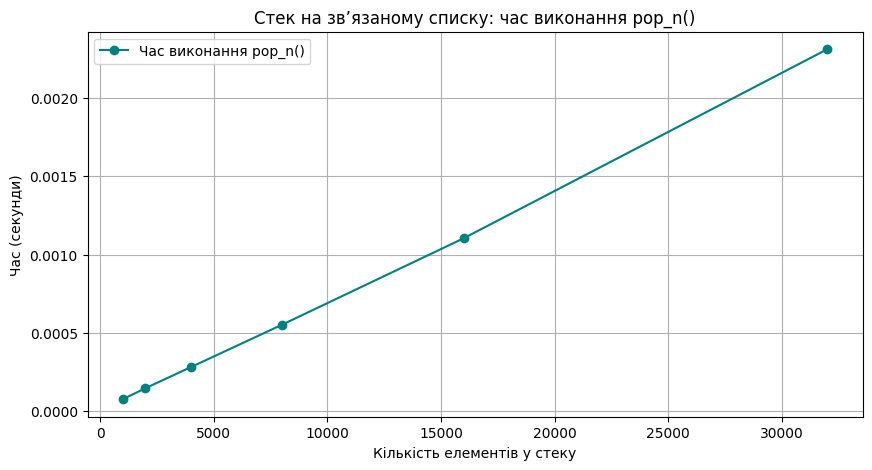

In [2]:
import time
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedStack:
    def __init__(self):
        self.top = None

    def push(self, value):
        new_node = Node(value)
        new_node.next = self.top
        self.top = new_node

    def pop(self):
        if self.top is None:
            return None
        value = self.top.data
        self.top = self.top.next
        return value

    def search(self, target):
        current = self.top
        while current:
            if current.data == target:
                return True
            current = current.next
        return False

    def is_empty(self):
        return self.top is None

    def pop_n(self, n):
        for _ in range(n + 1):
            if not self.is_empty():
                self.pop()
sizes = [1000, 2000, 4000, 8000, 16000, 32000]
times = []

for size in sizes:
    stack = LinkedStack()
    for i in range(size):
        stack.push(i)

    start = time.time()
    stack.pop_n(size // 2)  # видалити половину елементів
    end = time.time()
    
    times.append(end - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, times, marker='o', color='teal', label="Час виконання pop_n()")
plt.title("Стек на зв’язаному списку: час виконання pop_n()")
plt.xlabel("Кількість елементів у стеку")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.show()

### Асимптотична складність операцій (зв’язаний список)

#### Операція `push`
- **Часова складність**: `O(1)` — вставка на початок списку

#### Операція `pop`
- **Часова складність**: `O(1)` — зняття з вершини

#### Операція `search`
- **Середній випадок**: `O(n/2)` → `O(n)`
- **Найгірший випадок**: `O(n)`

#### Операція `pop_n(n)`
- Цикл із `n+1` викликів `pop()`, кожен з яких `O(1)`
- **Часова складність**: `O(n)`

#### Висновок:
На відміну від реалізації стеку через масив (`list`), у зв’язаному списку `pop(0)` немає проблем із зсувом елементів — отже, **операція `pop_n()` ефективніша** (`O(n)` проти `O(n²)` у масиві).


### Реалізація черги за допомогою зв’язаного списку

#### Завдання:
1. Реалізувати чергу за допомогою однозв’язаного списку.
2. Написати функцію `print_n(n)`, яка друкує перші `n+1` елементів черги.
3. Оцінити асимптотичну складність операцій `insert`, `delete`, `search`.
4. Побудувати графік часу виконання `print_n()` при зростанні кількості елементів.


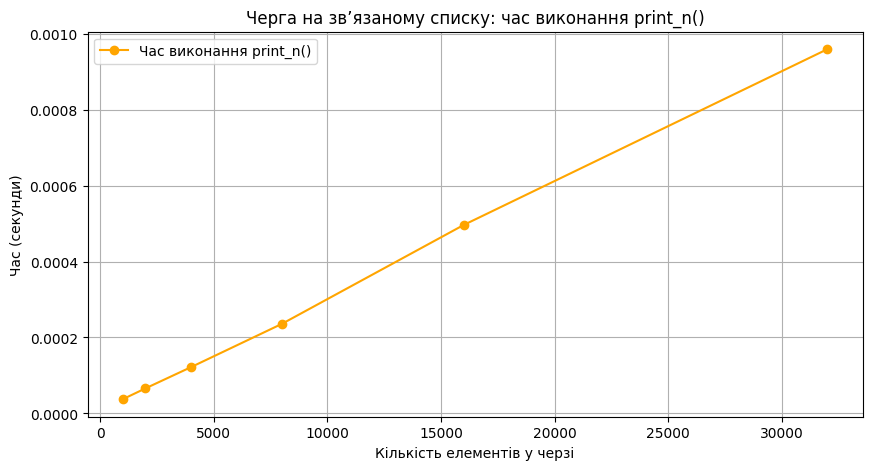

In [3]:
import time
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedQueue:
    def __init__(self):
        self.front = None
        self.rear = None

    def enqueue(self, value):
        new_node = Node(value)
        if self.rear:
            self.rear.next = new_node
        else:
            self.front = new_node
        self.rear = new_node

    def dequeue(self):
        if self.front is None:
            return None
        value = self.front.data
        self.front = self.front.next
        if self.front is None:
            self.rear = None
        return value

    def is_empty(self):
        return self.front is None

    def search(self, target):
        current = self.front
        while current:
            if current.data == target:
                return True
            current = current.next
        return False

    def print_n(self, n):
        result = []
        current = self.front
        count = 0
        while current and count <= n:
            result.append(current.data)
            current = current.next
            count += 1
        return result

sizes = [1000, 2000, 4000, 8000, 16000, 32000]
times = []

for size in sizes:
    queue = LinkedQueue()
    for i in range(size):
        queue.enqueue(i)
    
    start = time.time()
    queue.print_n(size // 2)
    end = time.time()

    times.append(end - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, times, marker='o', color='orange', label="Час виконання print_n()")
plt.title("Черга на зв’язаному списку: час виконання print_n()")
plt.xlabel("Кількість елементів у черзі")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.show()

### Асимптотична складність операцій у зв’язаній черзі

#### Операція `insert` (enqueue)
- Додає елемент в кінець
- **Часова складність**: `O(1)` (завдяки вказівнику на `rear`)

#### Операція `delete` (dequeue)
- Видаляє з початку
- **Часова складність**: `O(1)`

#### Операція `search`
- Перевіряє всі елементи до знаходження цілі
- **Середній випадок**: `O(n/2)` → `O(n)`
- **Найгірший випадок**: `O(n)`

#### Операція `print_n(n)`
- Перебір і друк перших `n+1` елементів
- **Часова складність**: `O(n)` (де `n` — кількість елементів до друку)

#### Висновок:
Зв’язаний список забезпечує **стабільну продуктивність** для базових операцій, але для `search` або `print_n` витрати зростають лінійно.


# 4. Які є застосування стека та черги в програмуванні і реальному житті?
### Застосування стека:
- **У програмуванні:** використовується для зберігання стану програми, наприклад, у функціях рекурсії, аналізі виразів (обчислення виразів у зворотному польському записі), перевірці збалансованості дужок.

- **У реальному житті:** стек можна порівняти з купою тарілок в ресторані — останню покладену тарілку беруть першою.

### Застосування черги:
- **У програмуванні:** черга використовується для організації черг запитів у сервісах, обробки задач у багатозадачності, обробки даних в реальному часі (наприклад, черга для обробки повідомлень).

- **У реальному житті:** черга — це, наприклад, черга людей в магазині або на автобусній зупинці.



# Підсумки
- **Стек** — це структура даних, що дозволяє додавати та видаляти елементи лише з верхньої частини, працюючи за принципом LIFO.

- **Черга** працює за принципом FIFO і має інші застосування, зокрема у багатозадачності.

- Реалізація стека може бути виконана через масив або зв’язаний список, кожен з яких має свої переваги та недоліки.

# Кінець звіту